In [1]:
import pickle
from collections import namedtuple
example = namedtuple('example', ['grid', 'robots', 'token', 'path', 'expl'])

with open('../data2/dataset6.pkl','rb') as f:
    dataset = pickle.load(f)

In [2]:
len(dataset)

99509

In [2]:
i = 0
expl,goal_robot,path = dataset[i].expl,dataset[i].token[0],dataset[i].path
goal_robot

'Y'

In [3]:
expl

[('G', 'Help', 'Y', 6), ('Y', 'get', 'goal', 7)]

In [4]:
path

[('Y', 'E'),
 ('G', 'W'),
 ('G', 'N'),
 ('G', 'E'),
 ('G', 'N'),
 ('Y', 'N'),
 ('Y', 'W')]

In [5]:
vectorized_dataset = []
from collections import defaultdict
colors = set(['R','B','Y','G'])
interaction_type = {'HA':1,'HP':2,'A':3}
for data in dataset:
    expl = data.expl
    path = data.path
    goal_robot = data.token[0]
    fine_expl = []
    sorted_expl = sorted(expl,key=lambda x:x[3])
    start_for_robots = {'R':0,'B':0,'G':0,'Y':0}
    for act in sorted_expl:
        if act[1] == "Avoid":
            fine_expl.append((act[0],'A',act[2]))
        elif act[1]=="get":
            continue
        else:
            start = start_for_robots[act[0]]
            end = act[3]
            if act[0] in map(lambda x:x[0],path[start:end]):
                fine_expl.append((act[0],'HA',act[2]))
            else:
                fine_expl.append((act[0],'HP',act[2]))
            start_for_robots[act[0]] = end
    selected_colors = colors.difference(set([goal_robot]))
    data_dict = {c:[0,0,0,0] for c in selected_colors}
    for act in fine_expl:
        if act[0]==goal_robot:
            continue
        data_dict[act[0]][0] +=1
        data_dict[act[0]][interaction_type[act[1]]] += 1
    robot_order = {k:v for v,k in enumerate([goal_robot] + list(map(lambda x:x[0],sorted(data_dict.items(),key=lambda x:x[1],reverse=True))))}    
    pre_vector = [[[0,0,0] for j in colors] for i in colors]
    for act in fine_expl:
        pre_vector[robot_order[act[0]]][robot_order[act[2]]][interaction_type[act[1]]-1] += 1
    vector = []
    for j in pre_vector:
        for i in j:
            vector += i
    vectorized_dataset.append("".join(map(str,vector)))
vectorized_dataset[0]

'000000000000100000000000000000000000000000000000'

In [6]:
from collections import Counter
distr = Counter(vectorized_dataset)
len(distr)

1275

In [7]:
interaction_type_rev = {1:'helped actively',2:'helped passively',3:'avoided'}
def decode_index(index):
    helper_id = (index // 12) + 1
    remainder = index % 12
    helped_id = (remainder // 3) + 1 
    remainder2 = (remainder % 3) + 1
    return f'R{helper_id} {interaction_type_rev[remainder2]} R{helped_id}'
    
def decode_str(code):
    decoded = []
    for i,s in enumerate(code):
        if s!= '0':
            decoded.append((decode_index(i),s))
    return decoded

In [8]:
sorted_distr = sorted([[k,v] for k,v in distr.items()],key=lambda x:x[1],reverse=True)

In [13]:
suma = 0
for i in sorted_distr[:200]:
    suma+=i[1]
suma

97772

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30)


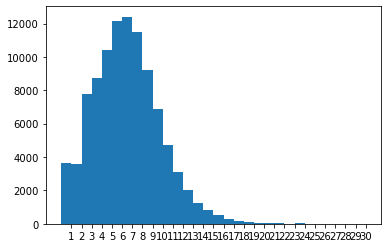

In [10]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
suma = 0
c = Counter()
for data in dataset:
    c[len(data.path)] += 1


labels, values = zip(*sorted(c.items(),key=lambda x:x[0]))
print(labels)
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [14]:
suma = 0
for s in sorted_distr[:]:
    decoded = decode_str(s[0])
    ln = len(decoded)
    helpers = list(map(lambda x:x[0][:2],decoded))
    if 'R1' in helpers:
        suma += s[1]

    if not 'R1' in helpers and ln > 2:
        suma += s[1]
        #print(decode_str(s[0]),s[1])
suma

10178

In [18]:
suma = 0
for s in sorted_distr[:]:
    decoded = decode_str(s[0])
    ln = len(decoded)
    helpers = list(map(lambda x:'av'==x[0][3:5],decoded))
    if sum(helpers)>2:
        suma += s[1]
        print(decode_str(s[0]),s[1])
print(suma)

[('R2 avoided R1', '1'), ('R3 avoided R1', '1'), ('R4 avoided R1', '1')] 3
[('R1 avoided R2', '1'), ('R2 helped passively R1', '1'), ('R2 avoided R1', '1'), ('R3 avoided R1', '1')] 2
[('R1 avoided R2', '1'), ('R2 avoided R1', '1'), ('R3 avoided R1', '1')] 1
[('R1 avoided R3', '1'), ('R2 avoided R1', '1'), ('R2 helped actively R3', '1'), ('R3 helped actively R1', '1'), ('R3 avoided R1', '1')] 1
[('R1 avoided R2', '1'), ('R2 helped actively R1', '1'), ('R2 avoided R1', '1'), ('R3 avoided R1', '1'), ('R3 helped actively R2', '1')] 1
[('R1 avoided R2', '1'), ('R2 helped passively R1', '1'), ('R2 avoided R1', '1'), ('R3 helped actively R1', '1'), ('R4 avoided R1', '1')] 1
[('R2 helped actively R1', '1'), ('R2 helped actively R3', '1'), ('R2 avoided R3', '1'), ('R3 helped actively R1', '1'), ('R3 avoided R2', '1'), ('R4 helped actively R1', '1'), ('R4 avoided R2', '1')] 1
10


In [20]:
len(sorted_distr)

1275

In [36]:
lenghts = [len(i.expl) for i in dataset]

In [37]:
lenghts[:10]

[2, 2, 3, 1, 2, 2, 2, 2, 1, 1]

Text(23, 45, '$\\mu=15, b=3$')

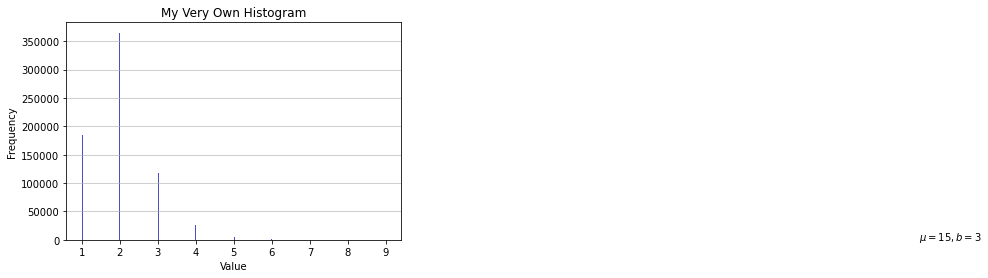

In [38]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=lenghts, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=1)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')